Try the Naive Bayes model

In [1]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)


2023-01-13 12:24:04,751 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-13 12:24:04,760 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


In [2]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

In [3]:
t = time.time()
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_multinomialclassifier_NBayes)

train time: 0.011999130249023438
2023-01-13 12:24:04,850 | INFO : Saving pickle file from: pickle\pkl_multinomialclassifier_NBayes.pkl


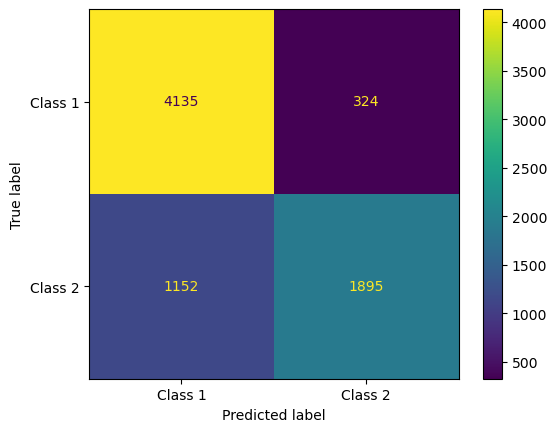

              precision    recall  f1-score   support

     Class 1       0.78      0.93      0.85      4459
     Class 2       0.85      0.62      0.72      3047

    accuracy                           0.80      7506
   macro avg       0.82      0.77      0.78      7506
weighted avg       0.81      0.80      0.80      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.59.


In [4]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The predictions for class one are very good with an F1 value of 0.85<br>
However there are a lot of recall misclassifications for class two and a lower F1 value of 0.73<br>
The Matthews Correlation Coefficient is 0.6

Now try the Complement Naive Bayes algorithm.<br>
This is similar to the Multinomial Bayes algorithm, but normally gives better results for imbalanced datasets.

In [5]:
t = time.time()
classifier = ComplementNB()
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_complementclassifier_NBayes)

train time: 0.006983041763305664
2023-01-13 12:24:05,190 | INFO : Saving pickle file from: pickle\pkl_complementclassifier_NBayes.pkl


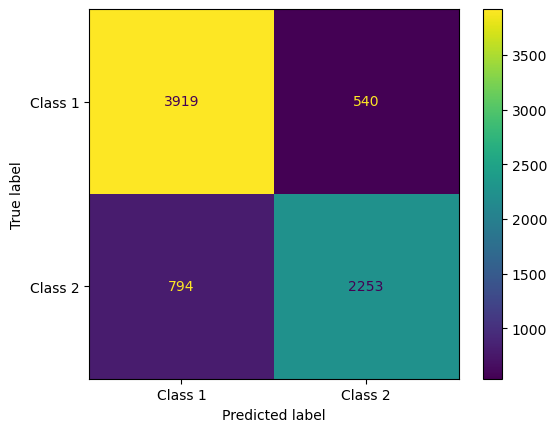

              precision    recall  f1-score   support

     Class 1       0.83      0.88      0.85      4459
     Class 2       0.81      0.74      0.77      3047

    accuracy                           0.82      7506
   macro avg       0.82      0.81      0.81      7506
weighted avg       0.82      0.82      0.82      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.63.


In [6]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The data imbalance is not huge and the Complement algorithm does not work better.

The results for all 3 algorithms - logistc regression, SVM aand Naive Bayes (Complement algorithm) used in this project are all very similar to each other. SVM gives the best results, but is also a lot slower than the other algorithms.

Now try Bigrams, Trigrams, Stemming and Lemmatization

2023-01-13 12:24:05,412 | INFO : Calculating for Bigram...
2023-01-13 12:24:05,413 | INFO : Loading pickle file from: pickle\pkl_X_bigram_tfidf.pkl
train time: 0.014988183975219727
2023-01-13 12:24:05,452 | INFO : Results for Bigram.


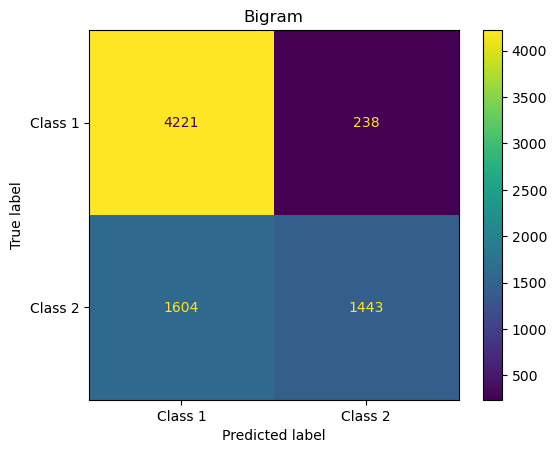

              precision    recall  f1-score   support

     Class 1       0.72      0.95      0.82      4459
     Class 2       0.86      0.47      0.61      3047

    accuracy                           0.75      7506
   macro avg       0.79      0.71      0.72      7506
weighted avg       0.78      0.75      0.74      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.49.
2023-01-13 12:24:05,612 | INFO : Calculating for Trigram...
2023-01-13 12:24:05,613 | INFO : Loading pickle file from: pickle\pkl_X_trigram_tfidf.pkl
train time: 0.013932228088378906
2023-01-13 12:24:05,654 | INFO : Results for Trigram.


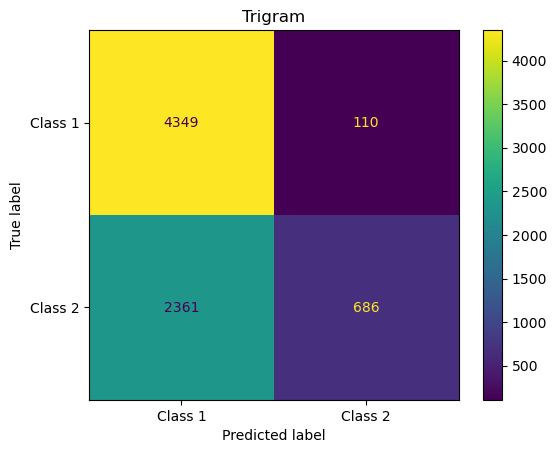

              precision    recall  f1-score   support

     Class 1       0.65      0.98      0.78      4459
     Class 2       0.86      0.23      0.36      3047

    accuracy                           0.67      7506
   macro avg       0.75      0.60      0.57      7506
weighted avg       0.73      0.67      0.61      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.32.
2023-01-13 12:24:05,834 | INFO : Calculating for Stemming...
2023-01-13 12:24:05,835 | INFO : Loading pickle file from: pickle\pkl_X_stem_tfidf.pkl
train time: 0.0069806575775146484
2023-01-13 12:24:05,871 | INFO : Results for Stemming.


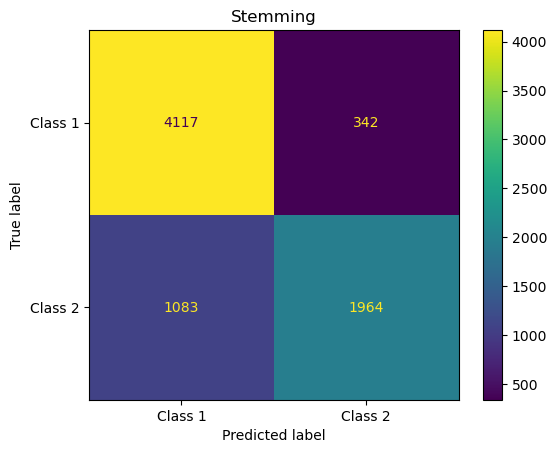

              precision    recall  f1-score   support

     Class 1       0.79      0.92      0.85      4459
     Class 2       0.85      0.64      0.73      3047

    accuracy                           0.81      7506
   macro avg       0.82      0.78      0.79      7506
weighted avg       0.82      0.81      0.80      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.6.
2023-01-13 12:24:06,048 | INFO : Calculating for Lemmatization...
2023-01-13 12:24:06,049 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
train time: 0.0069849491119384766
2023-01-13 12:24:06,079 | INFO : Results for Lemmatization.


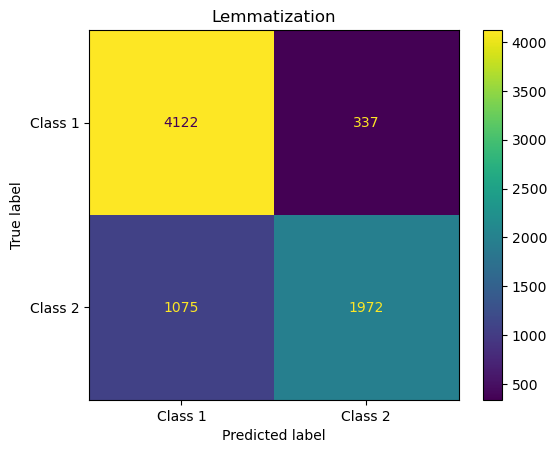

              precision    recall  f1-score   support

     Class 1       0.79      0.92      0.85      4459
     Class 2       0.85      0.65      0.74      3047

    accuracy                           0.81      7506
   macro avg       0.82      0.79      0.80      7506
weighted avg       0.82      0.81      0.81      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.61.


In [7]:
pickle_input = [(gl.pkl_X_bigram_tfidf, "Bigram"), (gl.pkl_X_trigram_tfidf, "Trigram"), (gl.pkl_X_stem_tfidf, "Stemming"), (gl.pkl_X_lem_tfidf, "Lemmatization")]
for pkl, title in pickle_input:
    logging.info(f"Calculating for {title}...")
    X_tfidf = load_pickle_object(pkl)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)
    t = time.time()
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    training_time = time.time() - t
    print(f"train time: {training_time}" )
    y_pred = classifier.predict(X_test)
    logging.info(f"Results for {title}.")
    display_metrics(y_test, y_pred, title)

The Multinomial model is getting better recall scores above 0.9 with F1 scores above 0.6.<br>
This may be the best model for the customer with good recall scores and OK F1 scores<br>
The Lemmatization data is giving the best results by a very small margin.